## Generate data

In this document, we generate a complete dataset by first, generating X features and then, creating an output feature based on a certain relation with the X features and the addition of random noise. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

pd.set_option("max_rows",250)
pd.set_option("max_columns",999)

import warnings
warnings.filterwarnings('ignore')
from numpy.random import rand,randint,randn, binomial,logistic, lognormal,weibull,\
gumbel,standard_exponential,standard_gamma

### Introduce function to quickly generate random data

In [2]:
#Specify all posible distributions to sample from
distriution_dict = {'uniform':rand,
                    'normal':randn}           

def return_feature(method,observations):
    return pd.Series(distriution_dict[method](observations))
    
#Make a function to quickly generate a pandas dataframe
def create_random_dataset(observations,features,dist_dict=distriution_dict):
    all_columns = np.random.choice(list(dist_dict.keys()),features)
    full_df = pd.DataFrame()
    for i in range(features):
        full_df[i]=return_feature(all_columns[i],observations)
    return full_df, all_columns

In [14]:
%%time
df,cols = create_random_dataset(10000,45)

Wall time: 28 ms


### Function to quickly get subset of columns with specific distribution

In [4]:
def select_subset(full_df,all_columns,method):
    return full_df[np.arange(len(all_columns))[all_columns==method]]

In [15]:
#Check amount of differenct distributions sampled, i.e. all features per catergory
tot = 0
for i in np.unique(cols):
    res = len(select_subset(df,cols,i).columns)
    tot += res
    print(i,':',res)
print(tot)

normal : 30
uniform : 15
45


### Function to add correlation to the data

In [16]:
def add_random_correlation(df_,iterator=100):
    df = df_.copy()
    for i in range(iterator):
        factor = np.random.uniform(low=0.1, high=2.5, size=1)[0]
        a,b = np.random.choice(df.columns.tolist(),2,replace=False)
        df[a] = df[a] + np.random.choice([-1,1],1)*factor*df[b]
    return df

In [17]:
%%time
df_poor = add_random_correlation(df,iterator=100)

Wall time: 56.1 ms


(array([   16.,    18.,    48.,    90.,  1186.,   452.,    96.,    28.,
           30.,    61.]),
 array([-0.98213356, -0.7839202 , -0.58570685, -0.38749349, -0.18928014,
         0.00893322,  0.20714658,  0.40535993,  0.60357329,  0.80178664,  1.        ]),
 <a list of 10 Patch objects>)

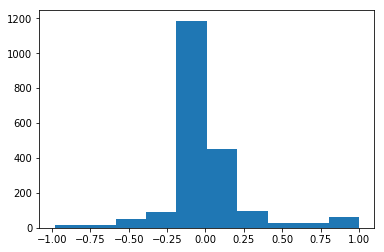

In [18]:
#Check Correlation across Data Set
plt.hist(df_poor.corr().values.ravel())

With 500 iterations, features are correlated with each other over and over again. Features will therefore have more extreme correlation than with 100 iterations. We will save both type of datasets.

Wall time: 300 ms


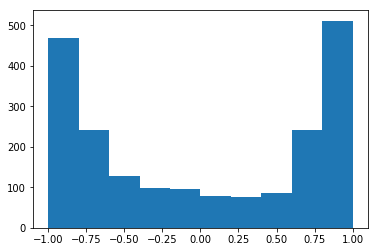

In [19]:
%%time
df_rich = add_random_correlation(df,iterator=500)
plt.hist(df_rich.corr().values.ravel())

### Create dependent variable

In [20]:
#Random linear function with noise
def create_random_linear_y(df_,noise_factor=1):
    df = df_.copy()
    length_ = len(df_.columns.tolist())
    random_weights = np.random.randn(length_) 
    print(random_weights.mean())
    df['y'] = np.dot(df.as_matrix(),random_weights.reshape(-1,1)) 
    df['y'] = df['y'] + noise_factor*np.random.randn(len(df))
    return df

The correlation between y and each individual x feature depends on the overall correlation between the features. By adding more or less noise to the y variable, we can influence how easy it is to predict y from a combination of those x features. We will save three levels of difficulties (normally distributed noise with a standard deviation of 0.1, 1 and 5) for each type of data correlation (poor and rich). 

In [27]:
df_poor_little = create_random_linear_y(df_poor, noise_factor = 0.1)
df_poor_much = create_random_linear_y(df_poor, noise_factor = 5)

-0.00385226615403
0.0366275187561


In [29]:
df_rich_little = create_random_linear_y(df_rich, noise_factor = 0.1)
df_rich_much = create_random_linear_y(df_rich, noise_factor = 5)

0.0429232441837
0.0232997578005


In [31]:
df_poor_little.to_csv('Data/custom_dataset_poor_little.txt',sep='\t')
df_poor_much.to_csv('Data/custom_dataset_poor_much.txt',sep='\t')
df_rich_little.to_csv('Data/custom_dataset_rich_little.txt',sep='\t')
df_rich_much.to_csv('Data/custom_dataset_rich_much.txt',sep='\t')